**Disney and hotstar data analysis**

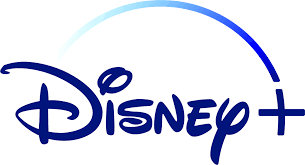

Reading data 

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv('/content/hotstar.csv')

In [7]:
df.head(5)

,hotstar_id,title,description,genre,year,age_rating,running_time,seasons,episodes,type
0,1835064133,The Ring,Mutually divorced Aman emotionally struggles t...,Drama,2021,U/A 13+,17.0,NaN,NaN,movie
1,1260015636,Jesus: Rise To Power And Birth Of Christianity,A journey across the historic landscapes of th...,Documentary,2019,U/A 13+,42.0,NaN,NaN,movie
2,1000070418,Yama Muduru,Krishna Kumar is popular in college for his mu...,Drama,2009,U/A 13+,129.0,NaN,NaN,movie
3,1770000804,X-Men: The Last Stand,"When humans find a cure for mutation, Professo...",Superhero,2006,U/A 13+,103.0,NaN,NaN,movie
4,1770005017,Mangalyaan: India's Mission To Mars,"In this special, watch the 650 million km jour...",Documentary,2017,U,44.0,NaN,NaN,movie


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6359 entries, 0 to 6358
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   hotstar_id    6359 non-null   int64  
 1   title         6359 non-null   object 
 2   description   6359 non-null   object 
 3   genre         6359 non-null   object 
 4   year          6359 non-null   int64  
 5   age_rating    6359 non-null   object 
 6   running_time  4188 non-null   float64
 7   seasons       2171 non-null   float64
 8   episodes      2171 non-null   float64
 9   type          6359 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 496.9+ KB


We dont need index as hotstar id is already provided. So set hotstar_id as index

In [9]:
df.set_index('hotstar_id',inplace=True)

In [10]:
df.head(5)

,title,description,genre,year,age_rating,running_time,seasons,episodes,type
hotstar_id,,,,,,,,,
1835064133,The Ring,Mutually divorced Aman emotionally struggles t...,Drama,2021,U/A 13+,17.0,NaN,NaN,movie
1260015636,Jesus: Rise To Power And Birth Of Christianity,A journey across the historic landscapes of th...,Documentary,2019,U/A 13+,42.0,NaN,NaN,movie
1000070418,Yama Muduru,Krishna Kumar is popular in college for his mu...,Drama,2009,U/A 13+,129.0,NaN,NaN,movie
1770000804,X-Men: The Last Stand,"When humans find a cure for mutation, Professo...",Superhero,2006,U/A 13+,103.0,NaN,NaN,movie
1770005017,Mangalyaan: India's Mission To Mars,"In this special, watch the 650 million km jour...",Documentary,2017,U,44.0,NaN,NaN,movie


Analyzing rows and cols, datstypes and numerical datasets

In [11]:
df.shape

(6359, 9)

In [12]:
df.describe()

,year,running_time,seasons,episodes
count,6359.000000,4188.000000,2171.000000,2171.000000
mean,2010.908162,104.016476,2.744357,126.118839
std,12.025939,45.989765,5.065703,253.941213
min,1928.000000,1.000000,1.000000,1.000000
25%,2008.000000,87.000000,1.000000,6.000000
50%,2015.000000,119.000000,1.000000,24.000000
75%,2019.000000,136.000000,2.000000,131.500000
max,2022.000000,199.000000,73.000000,3792.000000


No of null values present in each coloumn

In [13]:
df.isnull().sum()

title              0
description        0
genre              0
year               0
age_rating         0
running_time    2171
seasons         4188
episodes        4188
type               0
dtype: int64

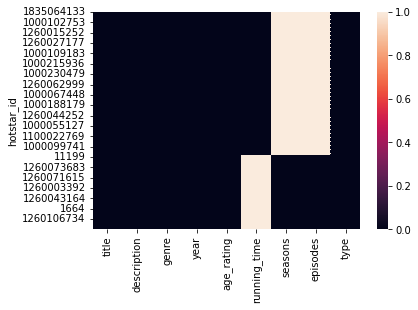

In [14]:
sns.heatmap(df.isnull(),cbar=True)

As length of the shows can be estimated by running_time column, seasons and episodes columns can be droped.

In [15]:
df.drop(columns=['seasons','episodes'],inplace=True)

In [16]:
df.head(5)

,title,description,genre,year,age_rating,running_time,type
hotstar_id,,,,,,,
1835064133,The Ring,Mutually divorced Aman emotionally struggles t...,Drama,2021,U/A 13+,17.0,movie
1260015636,Jesus: Rise To Power And Birth Of Christianity,A journey across the historic landscapes of th...,Documentary,2019,U/A 13+,42.0,movie
1000070418,Yama Muduru,Krishna Kumar is popular in college for his mu...,Drama,2009,U/A 13+,129.0,movie
1770000804,X-Men: The Last Stand,"When humans find a cure for mutation, Professo...",Superhero,2006,U/A 13+,103.0,movie
1770005017,Mangalyaan: India's Mission To Mars,"In this special, watch the 650 million km jour...",Documentary,2017,U,44.0,movie


Creating a dataset where running_time column is dropped

In [17]:
df1=df.dropna(axis=0,inplace=False,how='any')

In [18]:
df1.isnull().sum()

title           0
description     0
genre           0
year            0
age_rating      0
running_time    0
type            0
dtype: int64

In [19]:
df.age_rating.value_counts()

U/A 13+                  2598
U                        1062
U/A 7+                   1045
U/A 16+                   998
A                         271
PG                        252
G                          81
12+                        20
15+                         9
English                     6
Kannada                     4
Star Sports 1 Marathi       3
Hindi                       1
Tamil                       1
Star Sports 2               1
Star Vijay                  1
Star Sports Kannada 1       1
Star Suvarna                1
Marathi                     1
Star Sports 1 Telugu        1
Telugu                      1
Star Sports Hindi 1         1
Name: age_rating, dtype: int64

English, Star Sports 1 Marathi, Hindi, Tamil, Star Sports 2, Star Vijay, Star Sports Kannada 1, Star Suvarna, Marathi,Kannada, Star Sports 1 Telugu, Telugu and Star Sports Hindi 1 are not age_rating of shows. So, these instances can be dropped.

In [20]:
dropped_age_rating=['English','Kannada','Star Sports 1 Marathi','Hindi','Tamil','Star Sports 2', 'Star Sports Hindi 1', 'Star Vijay', 'Star Suvarna', 'Marathi', 'Star Sports 1 Telugu', 'Telugu', 'Star Sports Kannada 1']

In [21]:
df=df[df['age_rating'].isin(dropped_age_rating)==False]

In [22]:
df.age_rating.value_counts()

U/A 13+    2598
U          1062
U/A 7+     1045
U/A 16+     998
A           271
PG          252
G            81
12+          20
15+           9
Name: age_rating, dtype: int64

In [23]:
df['age_rating']=df.age_rating.str.replace('U/A 13+','13')
df['age_rating']=df.age_rating.str.replace('U/A 7+','7')
df['age_rating']=df.age_rating.str.replace('U/A 16+','16')

<ipython-input-23-1ff025fbba2e>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['age_rating']=df.age_rating.str.replace('U/A 13+','13')
<ipython-input-23-1ff025fbba2e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_rating']=df.age_rating.str.replace('U/A 13+','13')
<ipython-input-23-1ff025fbba2e>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['age_rating']=df.age_rating.str.replace('U/A 7+','7')
<ipython-input-23-1ff025fbba2e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [24]:
df.age_rating.value_counts()

13+    2598
U      1062
7+     1045
16+     998
A       271
PG      252
G        81
12+      20
15+       9
Name: age_rating, dtype: int64

In [25]:
df.genre.value_counts()

Drama               1806
Comedy               754
Romance              606
Action               583
Reality              377
Thriller             315
Family               247
Animation            223
Sport                208
Documentary          177
Animals & Nature     119
Kids                 104
Horror                96
Crime                 89
Talk Show             80
Mythology             76
Superhero             61
Standup Comedy        51
Adventure             44
Historical            41
Biopic                40
Science Fiction       38
Science               34
Teen                  31
Awards                27
Mystery               26
Lifestyle             26
Musical               15
Concert Film          12
Shorts                 7
Travel                 7
Docudrama              6
Food                   6
Fantasy                3
Kabaddi                1
Name: genre, dtype: int64

In [26]:
df.type.value_counts()

movie    4188
tv       2148
Name: type, dtype: int64

In [27]:
df.year.value_counts()

2017    517
2021    510
2019    503
2018    452
2020    432
       ... 
1958      1
1950      1
1951      1
1960      1
1942      1
Name: year, Length: 77, dtype: int64

In [28]:
df['year']=df['year'].astype('Int64')
df.dtypes

<ipython-input-28-dbf9000a1103>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year']=df['year'].astype('Int64')


title            object
description      object
genre            object
year              Int64
age_rating       object
running_time    float64
type             object
dtype: object

In [29]:
df['year'].head(5)

hotstar_id
1835064133    2021
1260015636    2019
1000070418    2009
1770000804    2006
1770005017    2017
Name: year, dtype: Int64

In [30]:
'Movies are from year {} to {}'.format(np.min(df.year),np.max(df.year))

'Movies are from year 1928 to 2022'

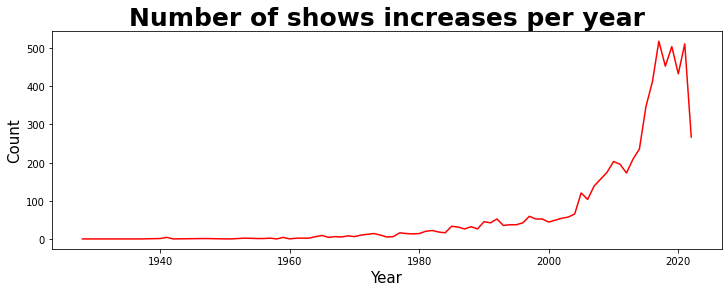

In [31]:
plt.figure(figsize=(12,4))
plt.title('Number of shows increases per year',fontdict={'fontsize':25},fontweight="bold")
plt.xlabel('Year',fontdict={'fontsize':15})
plt.ylabel('Count',fontdict={'fontsize':15})
sns.lineplot(x=df.year.value_counts().index, y=df.year.value_counts(), color='r')

Number of Movies/TV shows in hotstar from year 2006

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


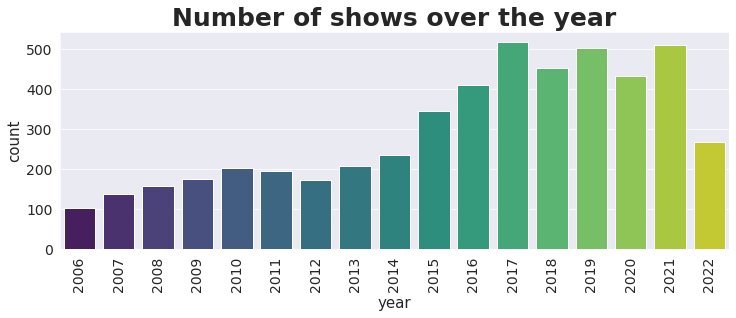

In [32]:
plt.figure(figsize=(12,4))
plt.rcParams['font.size'] = 14
sns.set_style('darkgrid')
plt.title('Number of shows over the year',fontdict={'fontsize':25},fontweight="bold")
plt.xlabel('Year',fontdict={'fontsize':15})
plt.ylabel('Number of Movie/TV shows',fontdict={'fontsize':15})
plt.xticks(rotation=90)
sns.countplot(df[df.year>2005].year,palette='viridis')

Top genre in the dataset

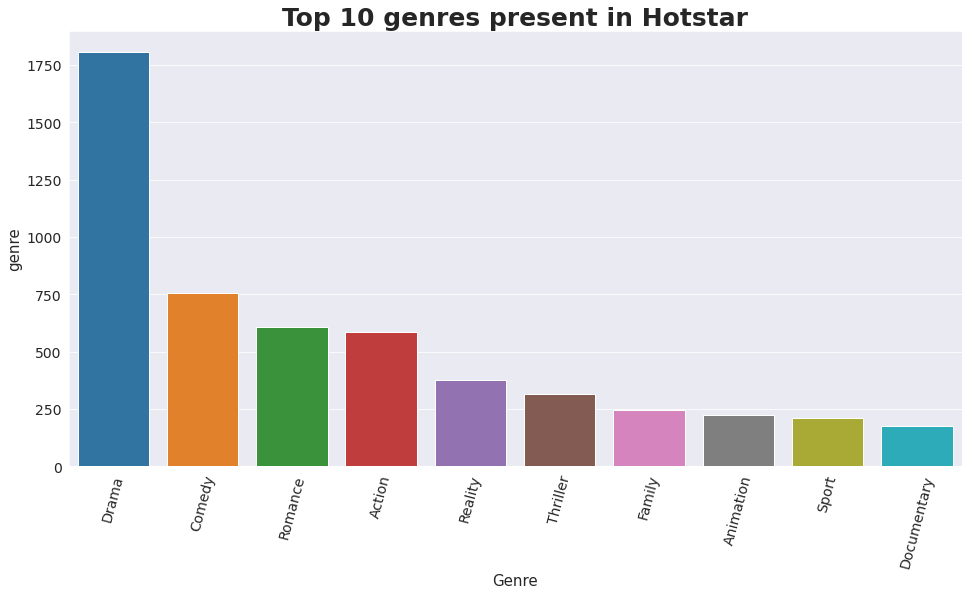

In [45]:
plt.figure(figsize=(16,8))
sns.set_style('darkgrid')
plt.title("Top 10 genres present in Hotstar",fontdict={'fontsize':25},fontweight='bold')
plt.xlabel('Genre',fontdict={'fontsize':15})
plt.xticks(rotation=75)
plt.ylabel('Count',fontdict={'fontsize':15})
data =df.genre.value_counts()[:10]
sns.barplot(x=data.index,y=data)

Distribution of running time

In [50]:
'Runnig time is distributed in between {} to {} minutes'.format(np.min(df.running_time),np.max(df.running_time))

'Runnig time is distributed in between 1.0 to 199.0 minutes'

All the null values present in running_time are removed earlier

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


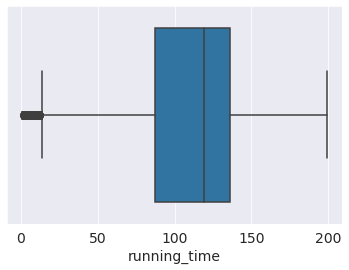

In [52]:
sns.boxplot('running_time',data=df)

Outliers are present in runnig_time column that should be removed

In [56]:
# Calculating interquartile range
Q1 = df.running_time.quantile(.25)
Q3 = df.running_time.quantile(.75)
iqr=Q3-Q1

All the outliers are removed

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


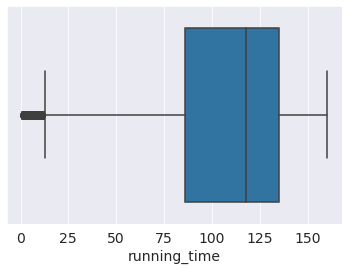

In [58]:
d=df[(df.running_time>Q3+(1.5*iqr)) | (df.running_time< Q1+(1.5*iqr))]
sns.boxplot(d.running_time)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


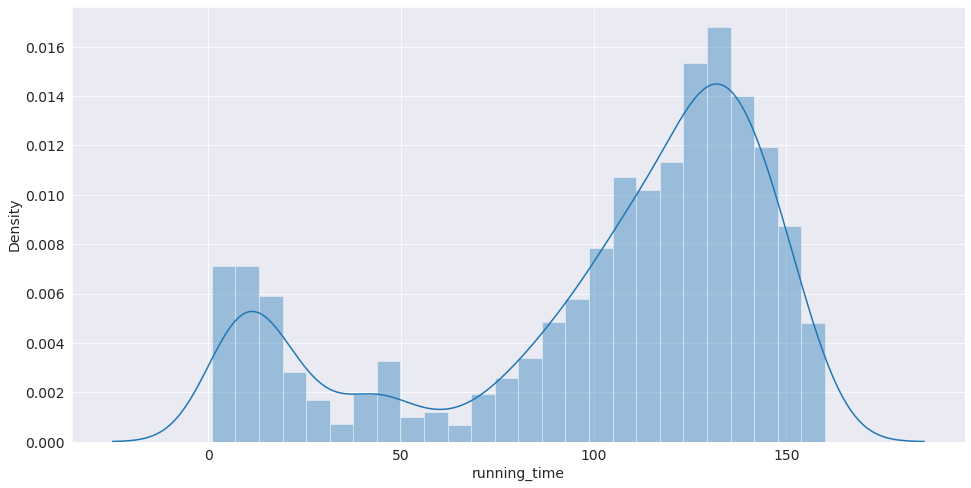

In [62]:
plt.figure(figsize=(16,8))
sns.distplot(d.running_time)

Different age_rating present in dataset

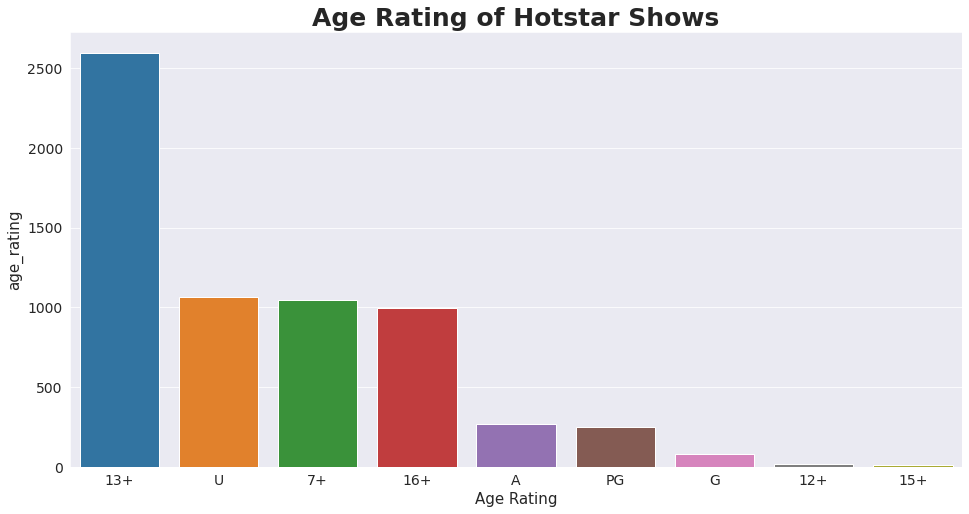

In [64]:
data= df.age_rating.value_counts()
plt.figure(figsize=(16,8))
sns.set_style('darkgrid')
plt.title('Age Rating of Hotstar Shows',fontdict={'fontsize':25},fontweight="bold")
plt.xlabel('Age Rating',fontdict={'fontsize':15})
plt.xticks(rotation=0)
plt.ylabel('Count',fontdict={'fontsize':15})
sns.barplot(x=data.index,y=data)

Types of Shows in Hotstar

([<matplotlib.patches.Wedge at 0x7f6aa2471b20>,
 [Text(-0.9622930979272468, -0.5329089919316263, 'movie'),
  Text(0.9622930480327018, 0.5329090820280065, 'tv')],
 [Text(-0.5248871443239528, -0.29067763196270524, '66.1%'),
  Text(0.5248871171087464, 0.2906776811061853, '33.9%')])

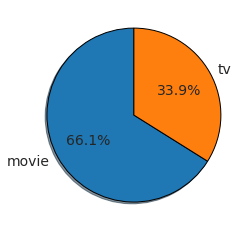

In [68]:
data = df.type.value_counts()
plt.pie(data,labels=data.index,shadow=True,startangle=90,autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})

Words that are mostly used in describtion

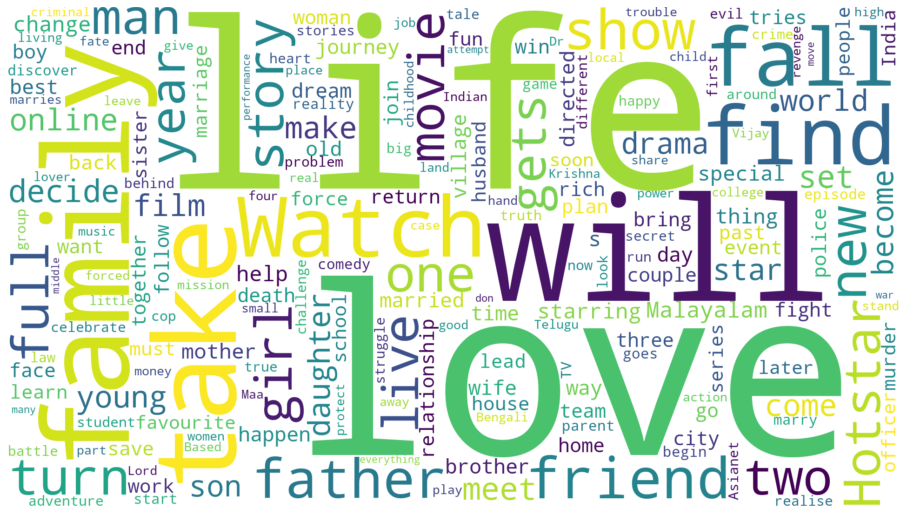

In [71]:
from wordcloud import WordCloud
image1 = " ".join(i for i in df['description'])
word_cloud1 = WordCloud(collocations = False, background_color = 'white',
                        width = 1920, height = 1080).generate(image1)
word_cloud1.to_file('ima1.png')
plt.figure(figsize=(16,16))
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()